### 1.IMPORT LIBRARIES

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

### 2. Import Dataset

In [3]:
df = pd.read_csv('car_evaluation.csv')

### 3. EDA (Exploratory Data Analysis)

In [4]:
df.shape

(1727, 7)

In [5]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [6]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

Rename Column names
- buying : buying price
- maint : price of maintenance
- doors : # of doors
- persons : capacity of persons to carry
- lug_boot : size of luggage boot
- safety : estimated safety of the car

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label']

In [11]:
df.columns = col_names

In [12]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'label'], dtype='object')

In [13]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,label
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [15]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   label     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [24]:
# 각 feature의 도수 분포
for col in col_names:
    pprint(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
label
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [25]:
df['label'].value_counts()

label
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [27]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
label       0
dtype: int64

### 4. Declare Feature vector && Target Variable

In [28]:
X = df.drop(['label'], axis=1)
Y = df['label']

### 5. Split Training && Test Dataset

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [30]:
X_train.shape, X_test.shape

((1208, 6), (519, 6))

### 6. Feature Engineering

In [31]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

Encode Categorical Variables

In [33]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,med,med,5more,4,big,high
585,high,high,3,more,small,med
1551,low,med,3,4,med,med
727,high,med,4,more,big,high
707,high,med,4,2,big,low


In [37]:
import category_encoders as ce

In [40]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

In [41]:
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [42]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1177,1,1,1,1,1,1
585,2,2,2,2,2,2
1551,3,1,2,1,3,2
727,2,1,3,2,1,1
707,2,1,3,3,1,3


### 7. Decision Tree Classifier with Gini Index Criterion

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [57]:
clt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)

In [58]:
clt_gini.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

Predict Test set

In [61]:
y_pred_gini = clt_gini.predict(X_test)

Check Accuracy Score with Gini Index Criterion

In [59]:
from sklearn.metrics import accuracy_score

In [62]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.4759


In [65]:
y_pred_train_gini = clt_gini.predict(X_train)

y_pred_train_gini

array(['acc', 'acc', 'acc', ..., 'unacc', 'unacc', 'acc'], dtype=object)

In [67]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8013


In [68]:
print('Training set score: {:.4f}'.format(clt_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clt_gini.score(X_test, Y_test)))

Training set score: 0.8013
Test set score: 0.4759


[Text(0.6666666666666666, 0.875, 'x[5] <= 2.5\ngini = 0.456\nsamples = 1208\nvalue = [266, 52, 848, 42]'),
 Text(0.5, 0.625, 'x[3] <= 2.5\ngini = 0.581\nsamples = 798\nvalue = [266, 52, 438, 42]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= 3.5\ngini = 0.632\nsamples = 547\nvalue = [266, 52, 187, 42]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.634\nsamples = 406\nvalue = [216.0, 52.0, 96.0, 42.0]'),
 Text(0.5, 0.125, 'gini = 0.458\nsamples = 141\nvalue = [50, 0, 91, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 251\nvalue = [0, 0, 251, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]'),
 Text(0.75, 0.75, '  False')]

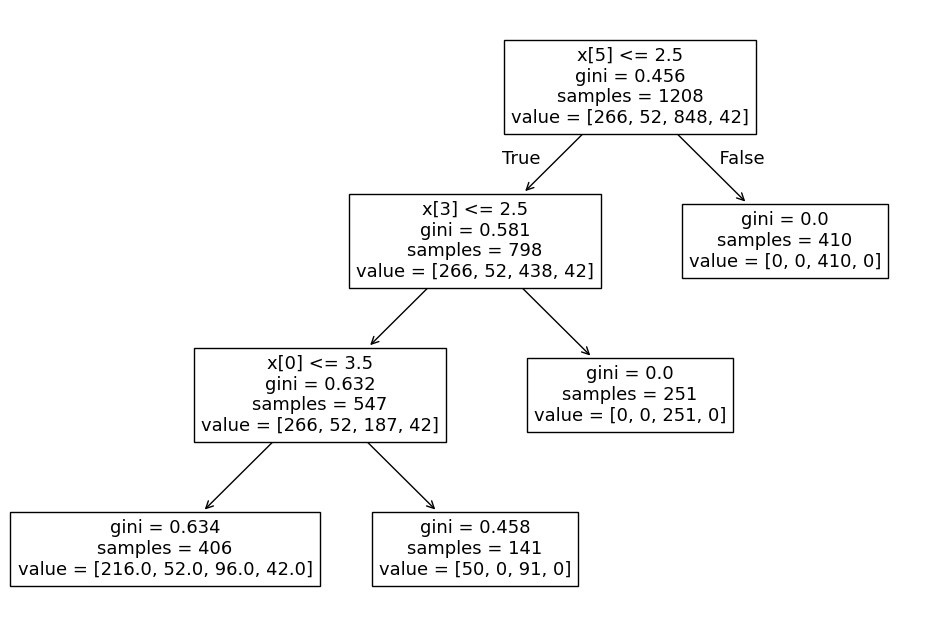

In [69]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clt_gini.fit(X_train, Y_train)) 

In [74]:
import graphviz
dot_data = tree.export_graphviz(clt_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=Y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

ModuleNotFoundError: No module named 'graphviz'